In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score,make_scorer, f1_score as sklearn_f1_score, classification_report
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [26]:
df=pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [28]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [29]:
df.drop(['id','Unnamed: 32'],axis = 'columns',inplace=True)

In [30]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
diagnosis = df['diagnosis'].value_counts()
diagnosis

B    357
M    212
Name: diagnosis, dtype: int64

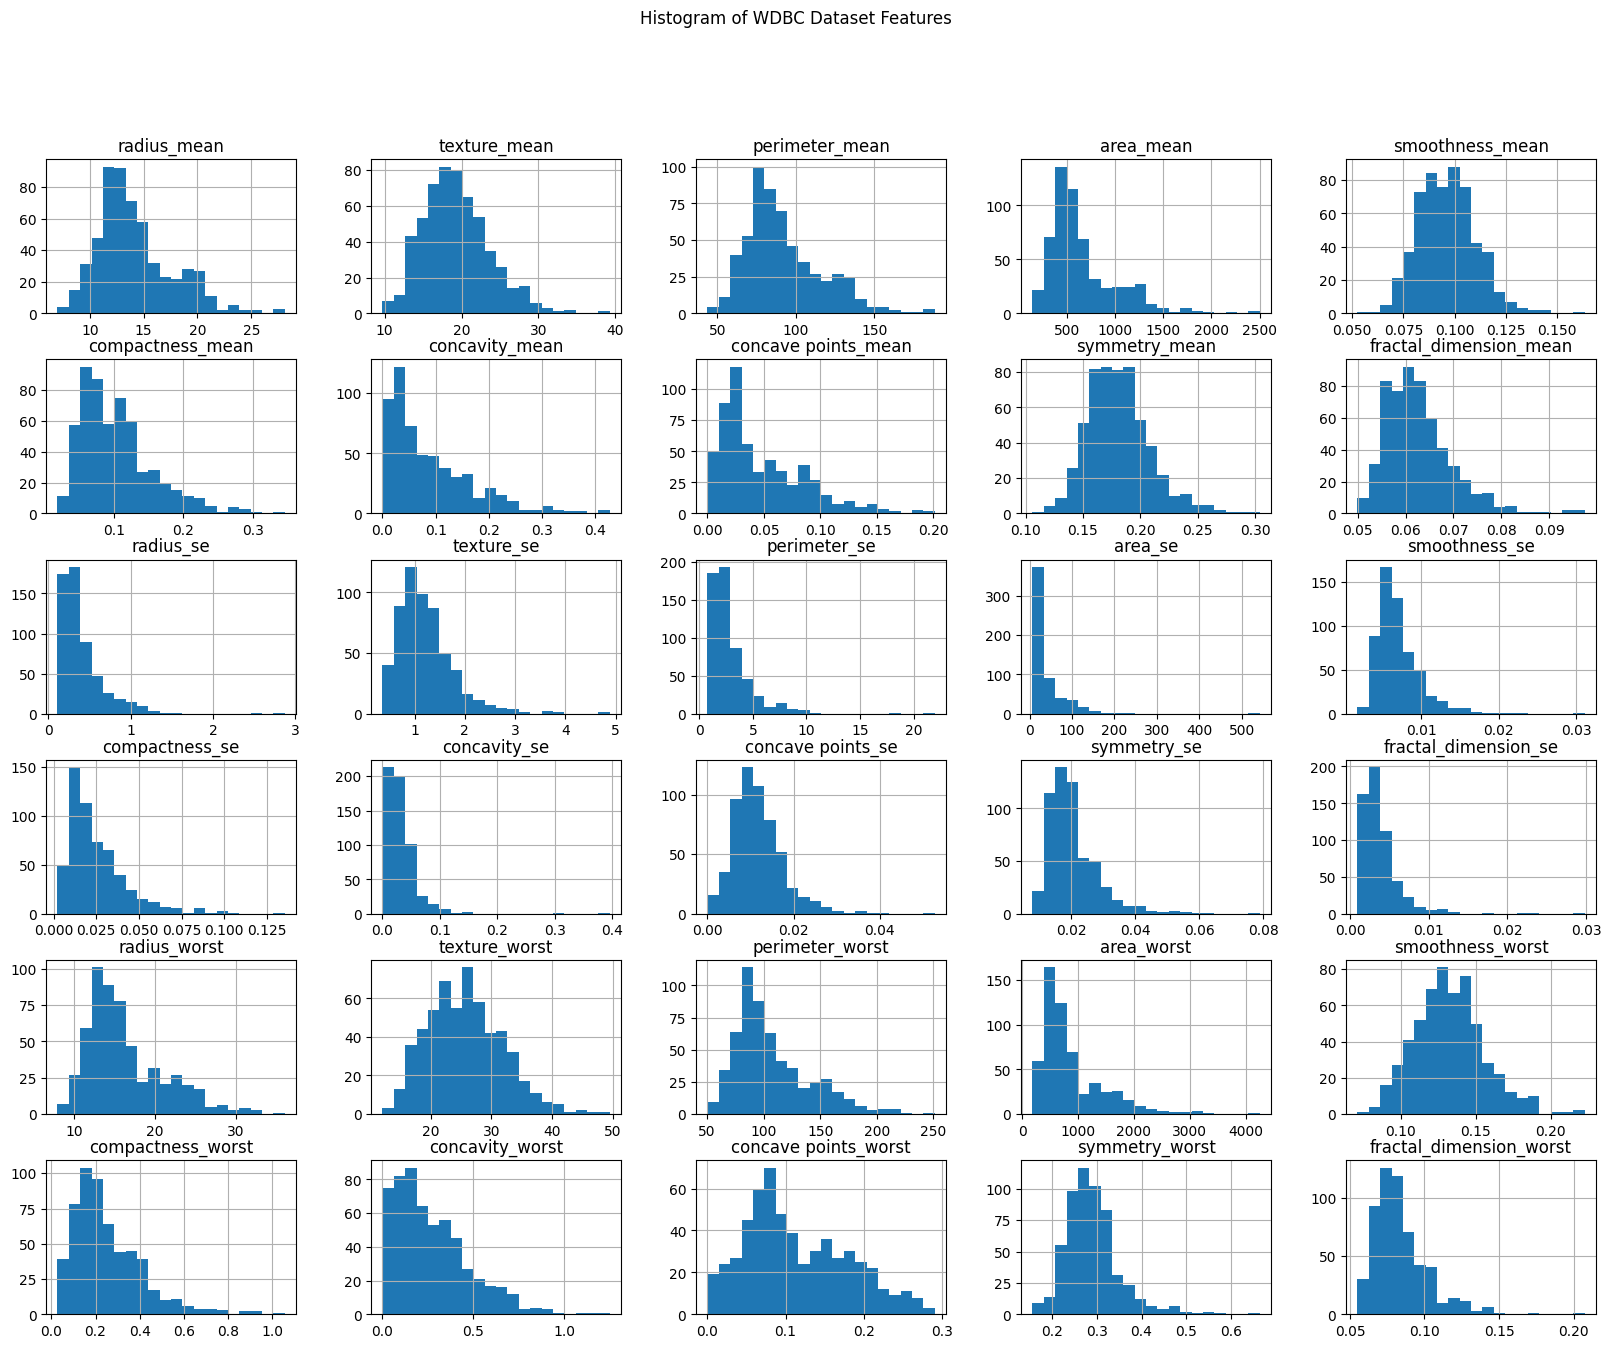

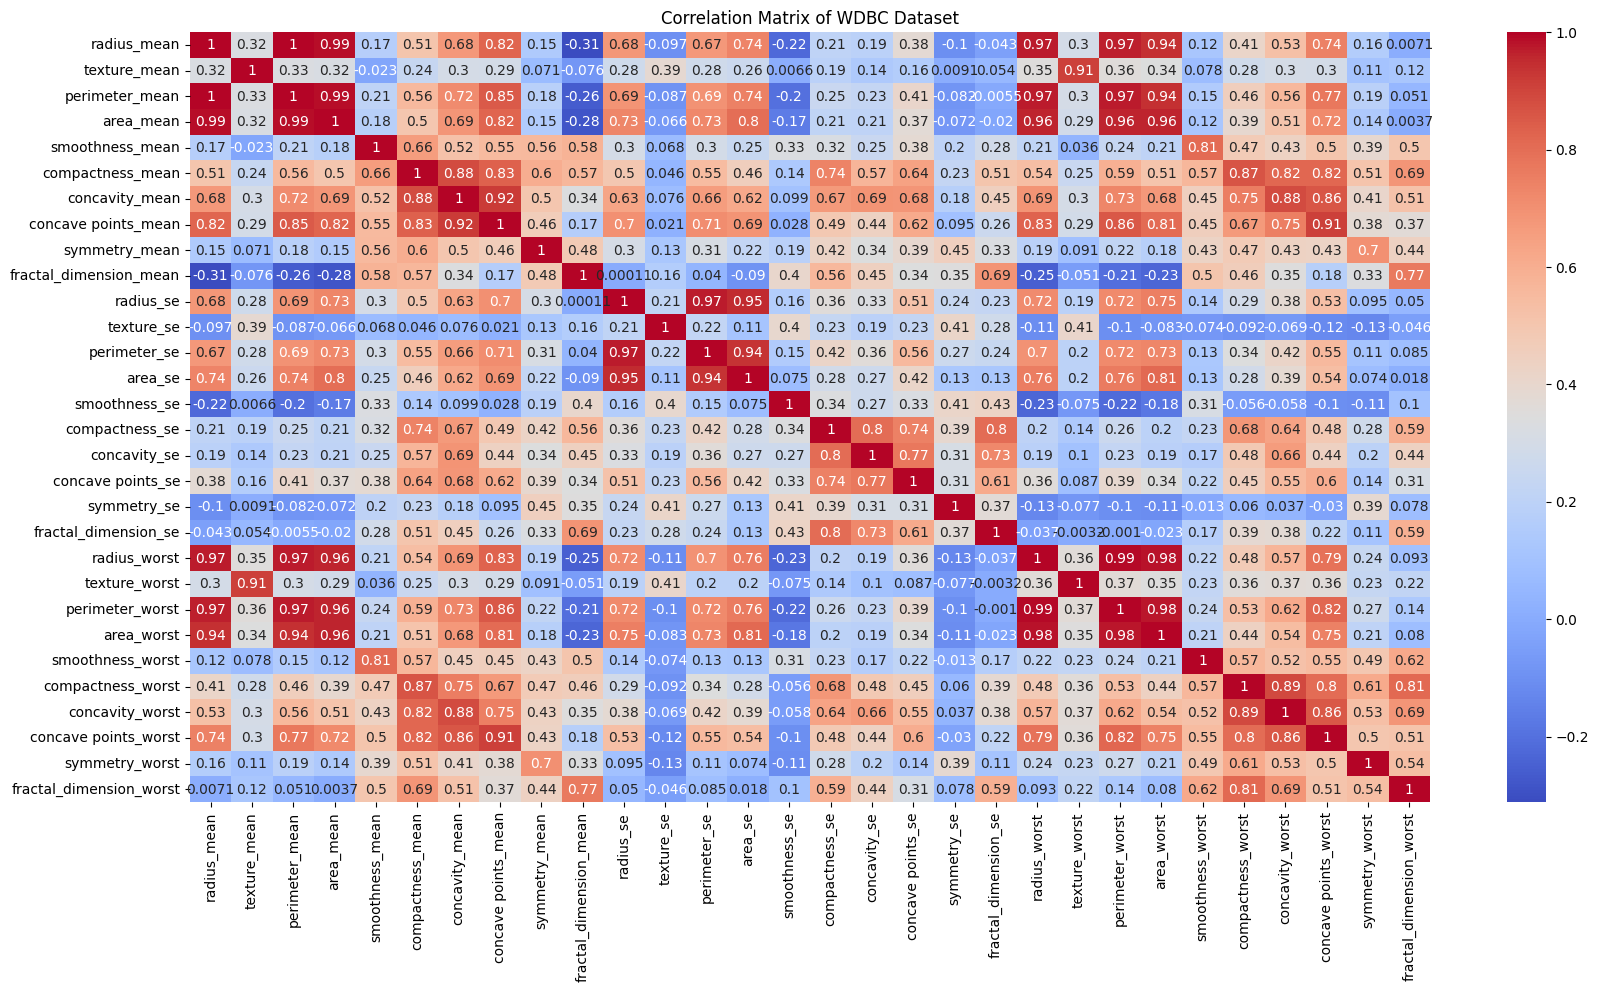

In [32]:
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histogram of WDBC Dataset Features')
plt.show()

plt.figure(figsize=(20, 10))
wpbc_corr_matrix = df.corr()
sns.heatmap(wpbc_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of WDBC Dataset')
plt.show()

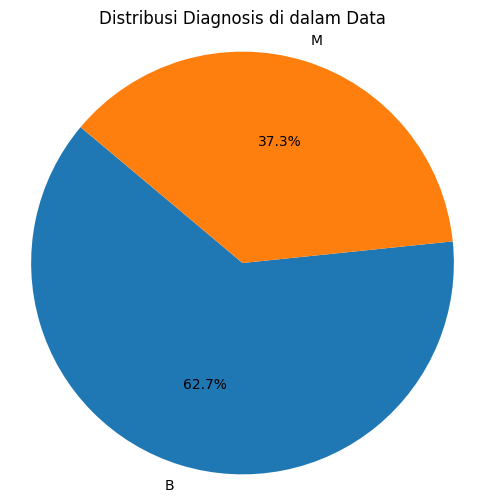

In [33]:
labels = diagnosis.index
sizes = diagnosis.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Diagnosis di dalam Data')
plt.axis('equal')
plt.show()

In [34]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [35]:
scaler = MinMaxScaler() 
X = scaler.fit_transform(X)

In [36]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [37]:
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=42)

In [38]:
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()

In [39]:
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
lr_pred = lr_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [41]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
score=[]

In [42]:
s=[]
s.append('Logistic Regression      ')
s.append(accuracy_score(y_test, lr_pred))
s.append(precision_score(y_test, lr_pred))
s.append(recall_score(y_test, lr_pred))
s.append(sklearn_f1_score(y_test, lr_pred))
score.append(s)

In [43]:
s=[]
s.append('K-Nearest Neighbour       ')
s.append(accuracy_score(y_test, knn_pred))
s.append(precision_score(y_test, knn_pred))
s.append(recall_score(y_test, knn_pred))
s.append(sklearn_f1_score(y_test, knn_pred))
score.append(s)

In [44]:
print('Model\t\t\t\tAccuracy\tPrecision\tRecall\t\tF1-score')
for s in score:
    for i in s:
        if(type(i)!=str):
            print('{:.3f}'.format(i), end='\t\t')
        else:
            print(i, end='\t')
    print()

Model				Accuracy	Precision	Recall		F1-score
Logistic Regression      	0.982		1.000		0.953		0.976		
K-Nearest Neighbour       	0.965		0.953		0.953		0.953		


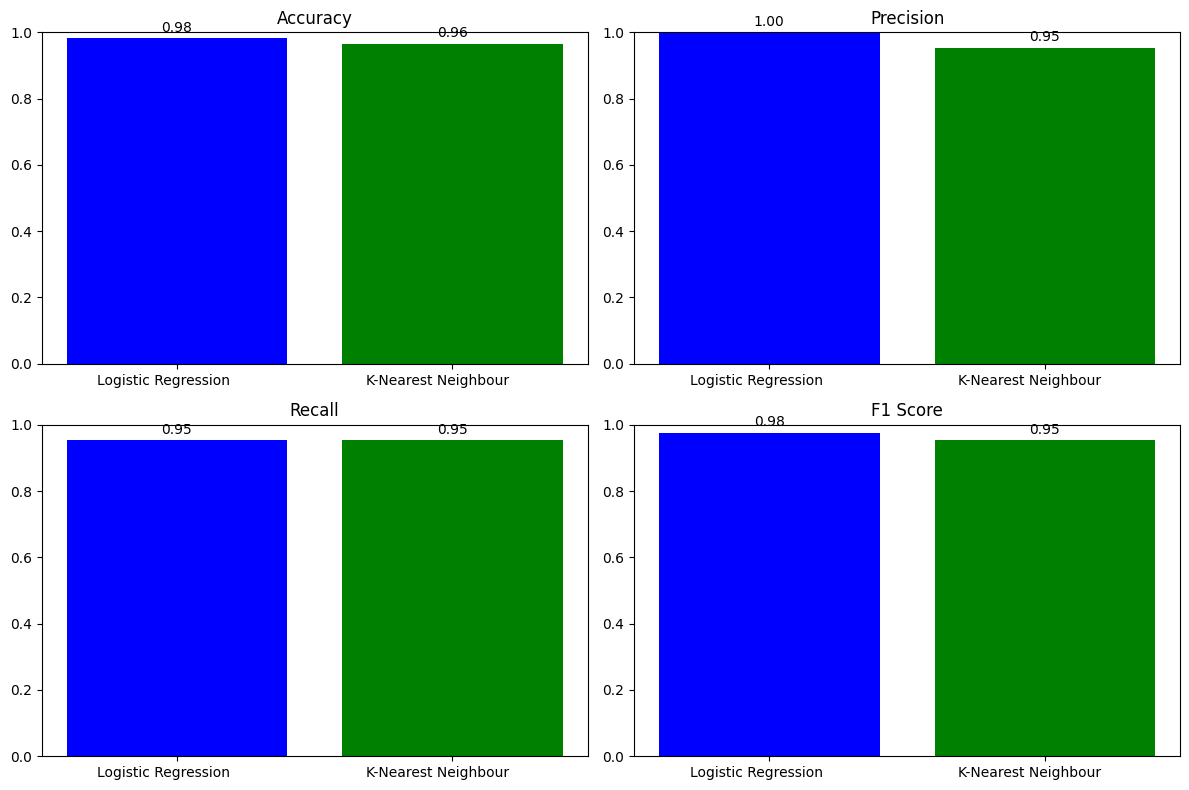

In [45]:
score_df = pd.DataFrame(score, columns=['Model'] + metrics)

# Plotting the scores
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.bar(score_df['Model'], score_df[metric], color=['blue', 'green'])
    plt.title(metric)
    plt.ylim(0, 1)
    for j in range(len(score_df)):
        plt.text(j, score_df[metric][j] + 0.02, f'{score_df[metric][j]:.2f}', ha='center')

plt.tight_layout()
plt.show()

In [46]:
# Define the model building function
def build_model(units1=64, units2=32, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units=units1, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=units2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=build_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'units1': [32, 64, 128],
    'units2': [16, 32, 64],
    'batch_size': [10, 20, 40],
    'epochs': [50, 100],
    'learning_rate': [0.01, 0.001, 0.0001]
}

# Create the scorer using F1-score
scorer = make_scorer(sklearn_f1_score)

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, n_jobs=-1, cv=3)

# Fit the model
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and the corresponding F1-score
print(f"Best parameters found: {grid_result.best_params_}")
print(f"Best F1-score: {grid_result.best_score_}")

# Evaluate the model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
test_f1_score = sklearn_f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy  = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall    = {recall}")
print(f"Test F1-score: {test_f1_score}")

C:\Users\gremlin\AppData\Local\Temp\ipykernel_10120\3000730320.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, verbose=0)


Best parameters found: {'batch_size': 40, 'epochs': 50, 'learning_rate': 0.001, 'units1': 128, 'units2': 64}
Best F1-score: 0.9648218029350105
4/4 [==============================] - 0s 844us/step
Accuracy  = 0.9736842105263158
Precision = 0.9761904761904762
Recall    = 0.9534883720930233
Test F1-score: 0.9647058823529412


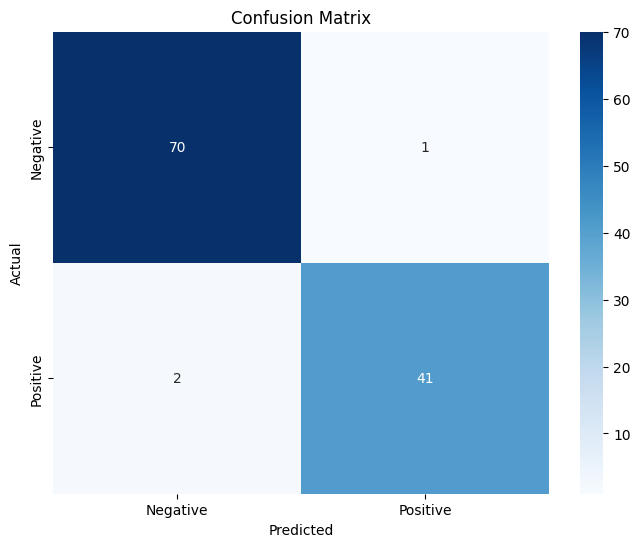

In [47]:
confmatrix = confusion_matrix(y_test, np.round(y_pred))

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()